# WeatherPy 

#### Observations:  Among the 560 Cities observed in this analysis of weather, the following are observations:  1.  Current temperatures from both hemispheres appear to correlate with the latitude in that the lower the latitude, the higher the temperature. 2.  This also showed to be the case with the Maximum temperatures recorded in this analysis with those cities located in the Northern Hemisphere, However, the correlation between Maximum temperatures and latitude in the cities observed in the Southern Hemisphere was not strong. 3.  Humidity and latitude did not appear to have a strong correlation in either hemisphere.  Please see final_cities_weather.csv for the data on the 560 observed cities.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from new_api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count
len(cities)
#print(cities)



613

In [4]:
requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q=los+angeles").json()

{'coord': {'lon': -118.2437, 'lat': 34.0522},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 51.15,
  'feels_like': 50.14,
  'temp_min': 46.71,
  'temp_max': 55.76,
  'pressure': 1014,
  'humidity': 89},
 'visibility': 9656,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1643719200,
 'sys': {'type': 2,
  'id': 2009067,
  'country': 'US',
  'sunrise': 1643727001,
  'sunset': 1643764983},
 'timezone': -28800,
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
lon = []
humidity = []
temp_max = []
clouds = []
country = []
city_id=[]
date = []
wind = []
all_rows=[]
 

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if len(all_rows) %10== 0:
        time.sleep(2)
    response = requests.get(query_url + city).json()
    try:

        temp={
            "name":city,
            "lat":response['coord']['lat'],
            "lon":response['coord']['lon'],
            "temp":response['main']['temp'],
            "humidity":response['main']['humidity'],
            "temp_max":response['main']['temp_max'],
            "clouds":response['clouds']['all'],
            "wind":response['wind']['speed'],
            "country":response['sys']['country'],
            "city_id":response['id'],
            "date":response['dt']
                
        }
        all_rows.append(temp)

    except Exception as e:
        print(e)
    


'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'


In [6]:
pd.DataFrame(all_rows)

,name,lat,lon,temp,humidity,temp_max,clouds,wind,country,city_id,date
0,rikitea,-23.1203,-134.9692,77.83,68,77.83,87,7.58,PF,4030556,1643719764
1,arraial do cabo,-22.9661,-42.0278,82.26,78,82.36,75,3.44,BR,3471451,1643719765
2,busselton,-33.6500,115.3333,68.04,42,68.04,0,18.45,AU,2075265,1643719766
3,yellowknife,62.4560,-114.3525,-23.15,76,-22.45,20,9.22,CA,6185377,1643719727
4,hasaki,35.7333,140.8333,32.40,48,32.40,1,15.39,JP,2112802,1643719767
...,...,...,...,...,...,...,...,...,...,...,...
555,puerto escondido,15.8500,-97.0667,70.63,88,70.63,0,4.61,MX,3520994,1643720071
556,salta,-24.7859,-65.4117,68.20,75,70.57,40,3.44,AR,3838233,1643719832
557,egvekinot,66.3167,-179.1667,-0.81,67,-0.81,100,14.72,RU,4031742,1643720072
558,nanakuli,21.3906,-158.1547,68.04,88,73.35,0,3.44,US,5851349,1643720072


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df = pd.DataFrame(all_rows)
city_weather_df

,name,lat,lon,temp,humidity,temp_max,clouds,wind,country,city_id,date
0,rikitea,-23.1203,-134.9692,77.83,68,77.83,87,7.58,PF,4030556,1643719764
1,arraial do cabo,-22.9661,-42.0278,82.26,78,82.36,75,3.44,BR,3471451,1643719765
2,busselton,-33.6500,115.3333,68.04,42,68.04,0,18.45,AU,2075265,1643719766
3,yellowknife,62.4560,-114.3525,-23.15,76,-22.45,20,9.22,CA,6185377,1643719727
4,hasaki,35.7333,140.8333,32.40,48,32.40,1,15.39,JP,2112802,1643719767
...,...,...,...,...,...,...,...,...,...,...,...
555,puerto escondido,15.8500,-97.0667,70.63,88,70.63,0,4.61,MX,3520994,1643720071
556,salta,-24.7859,-65.4117,68.20,75,70.57,40,3.44,AR,3838233,1643719832
557,egvekinot,66.3167,-179.1667,-0.81,67,-0.81,100,14.72,RU,4031742,1643720072
558,nanakuli,21.3906,-158.1547,68.04,88,73.35,0,3.44,US,5851349,1643720072


In [8]:
#Create Output File
city_weather_df.to_csv("../output_data/final_cities_weather.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
high_humidity_cities=city_weather_df.loc[(city_weather_df["humidity"]>100),:]
print(high_humidity_cities)

Empty DataFrame
Columns: [name, lat, lon, temp, humidity, temp_max, clouds, wind, country, city_id, date]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

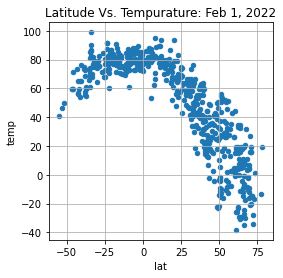

In [25]:
# Create a scatter plot which compares Latitude to Temporature
city_weather_df.plot(kind="scatter", x="lat", y="temp", grid=True, figsize=(4,4),
              title="Latitude Vs. Tempurature: Feb 1, 2022")
plt.show()

In [ ]:
#The above graph is plotting the Tempurature in Fahrenheit at the observed city's latitudes.

## Latitude vs. Humidity Plot

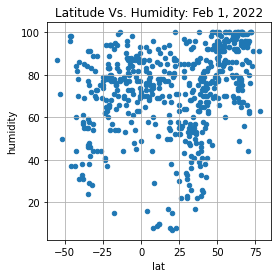

In [26]:
# Create a scatter plot which compares Latitude to Humidity
city_weather_df.plot(kind="scatter", x="lat", y="humidity", grid=True, figsize=(4,4),
              title="Latitude Vs. Humidity: Feb 1, 2022")
plt.show()

#The above graph is plotting the Humidity at the observed city's latitudes.

## Latitude vs. Cloudiness Plot

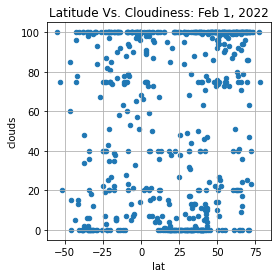

In [27]:
# Create a scatter plot which compares Latitude to Cloudiness
city_weather_df.plot(kind="scatter", x="lat", y="clouds", grid=True, figsize=(4,4),
              title="Latitude Vs. Cloudiness: Feb 1, 2022")
plt.show()

#The above graph is plotting the percentage of cloudiness at the observed city's latitudes.

## Latitude vs. Wind Speed Plot

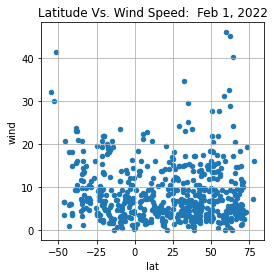

In [28]:
# Create a scatter plot which compares Latitude to Wind Speed
city_weather_df.plot(kind="scatter", x="lat", y="wind", grid=True, figsize=(4,4),
              title="Latitude Vs. Wind Speed:  Feb 1, 2022")
plt.show()

#The above graph is plotting the Wind Speeds in miles per hour at the observed city's latitudes.

## Linear Regression

In [14]:
#Create DataFrames for Northern Hemisphere and Southern Hemisphere

Northern_df = city_weather_df.loc[(city_weather_df["lat"]>0),:]
Northern_df

,name,lat,lon,temp,humidity,temp_max,clouds,wind,country,city_id,date
3,yellowknife,62.4560,-114.3525,-23.15,76,-22.45,20,9.22,CA,6185377,1643719727
4,hasaki,35.7333,140.8333,32.40,48,32.40,1,15.39,JP,2112802,1643719767
5,turukhansk,65.8167,87.9833,10.71,94,10.71,100,10.89,RU,1488903,1643719768
6,anadyr,64.7500,177.4833,18.10,79,18.10,20,40.26,RU,2127202,1643719769
7,kavaratti,10.5669,72.6420,81.12,69,81.12,5,9.60,IN,1267390,1643719769
...,...,...,...,...,...,...,...,...,...,...,...
553,horki,54.2861,30.9842,26.58,93,26.58,100,11.86,BY,627905,1643720070
554,dourbali,11.8091,15.8632,82.38,10,82.38,4,4.81,TD,2433055,1643720071
555,puerto escondido,15.8500,-97.0667,70.63,88,70.63,0,4.61,MX,3520994,1643720071
557,egvekinot,66.3167,-179.1667,-0.81,67,-0.81,100,14.72,RU,4031742,1643720072


In [16]:
Southern_df = city_weather_df.loc[(city_weather_df["lat"]<0),:]
Southern_df

,name,lat,lon,temp,humidity,temp_max,clouds,wind,country,city_id,date
0,rikitea,-23.1203,-134.9692,77.83,68,77.83,87,7.58,PF,4030556,1643719764
1,arraial do cabo,-22.9661,-42.0278,82.26,78,82.36,75,3.44,BR,3471451,1643719765
2,busselton,-33.6500,115.3333,68.04,42,68.04,0,18.45,AU,2075265,1643719766
8,samfya,-11.3649,29.5565,76.98,69,76.98,74,0.67,ZM,899274,1643719770
9,port elizabeth,-33.9180,25.5701,86.29,58,92.10,40,11.50,ZA,964420,1643719770
...,...,...,...,...,...,...,...,...,...,...,...
545,chiradzulu,-15.6746,35.1407,74.91,73,74.91,77,5.88,MW,930580,1643720066
547,porto velho,-8.7619,-63.9039,77.05,88,77.05,40,4.61,BR,3662762,1643720008
550,fare,-16.7000,-151.0167,80.31,76,80.31,5,18.05,PF,4034496,1643720069
556,salta,-24.7859,-65.4117,68.20,75,70.57,40,3.44,AR,3838233,1643719832


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2577139479682782


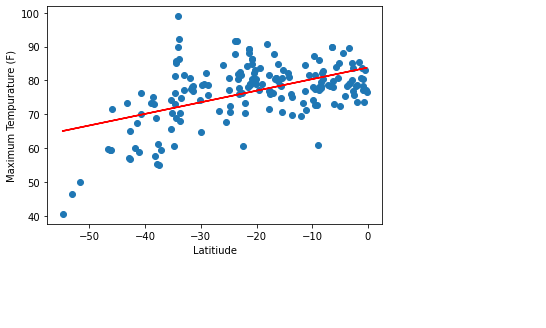

In [17]:

x_values = Southern_df['lat']
y_values = Southern_df['temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Maximum Tempurature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7404673571125754


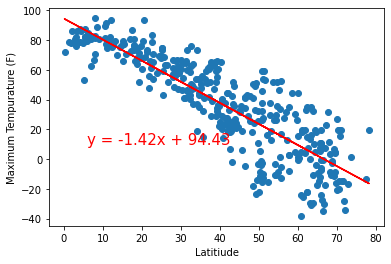

In [18]:
x_values = Northern_df['lat']
y_values = Northern_df['temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Maximum Tempurature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1612349639018104


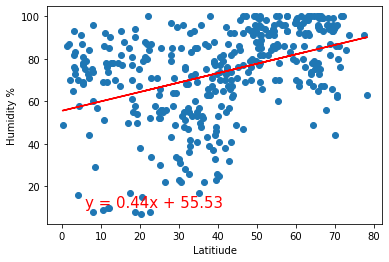

In [19]:

x_values = Northern_df['lat']
y_values = Northern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09749241662694325


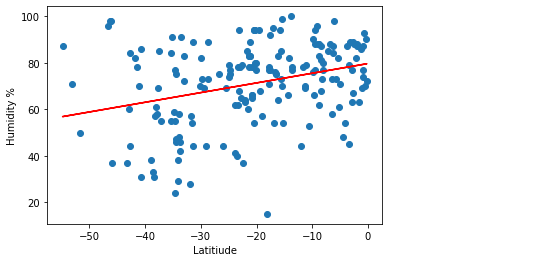

In [20]:

x_values = Southern_df['lat']
y_values = Southern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08876174800183788


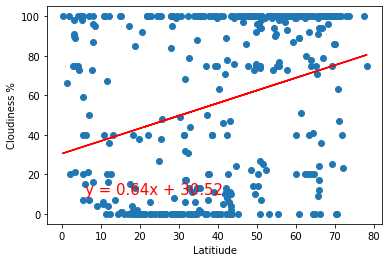

In [21]:

x_values = Northern_df['lat']
y_values = Northern_df['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08465021242793831


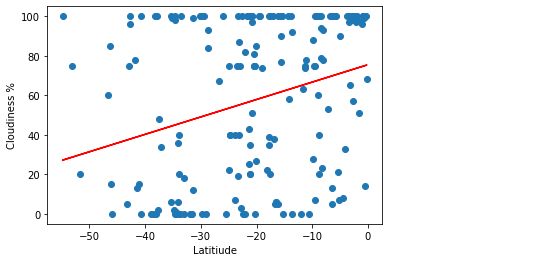

In [22]:

x_values = Southern_df['lat']
y_values = Southern_df['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00455982601260782


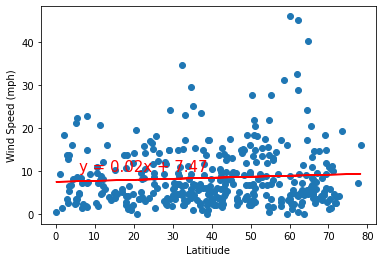

In [23]:

x_values = Northern_df['lat']
y_values = Northern_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12278669956109499


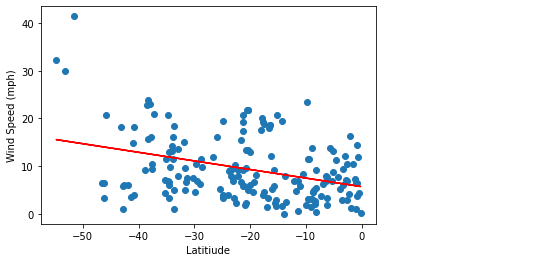

In [24]:

x_values = Southern_df['lat']
y_values = Southern_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitiude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()